# G2M insight for cab investment
XYZ is a private firm in US planning for an investment in Cab industry.

Problem: Generate actionable insights to identify the right Cab company for XYZ to make investments.

## Data description
The data describes fares and customers data of two different cab companies.

Time period of data is from 31/01/2016 to 31/12/2018.

It consists of 4 different datasets:

- **Cab_Data.csv** – Details of transaction for 2 cab companies.
- **City.csv** – Contains list of US cities, their population and number of cab users.
- **Customer_ID.csv** – Mapping table that contains a unique identifier which links the customer’s demographic details.
- **Transaction_ID.csv** – Mapping table that contains transaction to customer mapping and payment mode.

In [1]:
import os
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import ttest_ind

In [2]:
# Setting the working directory
os.chdir(r'C:\Users\noe2g\Documents\empleo\data_glacier_internship\week_2\DataSets')

## Loading datasets

### Cab data

Dataset consisting of 7 variables and 359,392 observations.

Variables:
- **Transaction ID**: Unique identifier for each transaction.
- **Date of Travel**: Date of the ride.
- **Company**: Either Yellow Cab or Pink Cab. The company used for the ride.
- **City**: City on which the ride took place.
- **KM Travelled**: Numer of kilometers of the ride.
- **Price Charged**: The final price charged to the customer for the ride.
- **Cost of trip**: The raw cost of the ride.

| Variable       | Type         | Scale    |
| :----:         |:----:        | :----:   |
| Transaction ID | Categorical  | Nominal  |
| Date of Travel | Quantitative | Interval |
| Company        | Categorical  | Nominal  |
| City           | Categorical  | Nominal  |
| KM Travelled   | Quantitative | Ratio    |
| Price Charged  | Quantitative | Ratio    |
| Cost of trip   | Quantitative | Ratio    |

Apparently, there are no missing values nor duplicates.

In [3]:
df_cab = pd.read_csv('Cab_Data.csv')

In [4]:
print(df_cab.shape)
df_cab.head()

(359392, 7)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [5]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [6]:
df_cab.nunique()

Transaction ID    359392
Date of Travel      1095
Company                2
City                  19
KM Travelled         874
Price Charged      99176
Cost of Trip       16291
dtype: int64

### City data

Dataset consisting of 3 variables and 20 observations.

Variables:
- **City**: City on which the ride took place.
- **Population**: Population of each of the cities.
- **Users**: Total number of users of the two cab companies.

| Variable       | Type         | Scale    |
| :----:         |:----:        | :----:   |
| City           | Categorical  | Nominal  |
| Population     | Quantitative | Ratio    |
| Users          | Quantitative | Ratio    |

Apparently, there are no missing values nor duplicates.

In [7]:
df_city = pd.read_csv('City.csv', thousands=',')

In [8]:
print(df_city.shape)
df_city.head()

(20, 3)


,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [9]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [10]:
df_city.nunique()

City          20
Population    20
Users         20
dtype: int64

### Customer data

Dataset consisting of 4 variables and 49,171 observations.

Variables:
- **Customer ID**: Unique identifier for each customer.
- **Gender**: Gender of the customer. Either male or female.
- **Age**: Age of the customer.
- **Income (USD/Month)**: Monthly income of the customer in U.S. dollars.

| Variable           | Type         | Scale    |
| :----:             |:----:        | :----:   |
| Customer ID        | Categorical  | Nominal  |
| Gender             | Categorical  | Nominal  |
| Age                | Quantitative | Ratio    |
| Income (USD/Month) | Quantitative | Ratio    |

Apparently, there are no missing values nor duplicates.

In [11]:
df_customer = pd.read_csv('Customer_ID.csv')

In [12]:
print(df_customer.shape)
df_customer.head()

(49171, 4)


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [13]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [14]:
df_customer.nunique()

Customer ID           49171
Gender                    2
Age                      48
Income (USD/Month)    23341
dtype: int64

### Transaction data

Dataset consisting of 3 variables and 440,098 observations.

Variables:
- **Transaction ID**: Unique identifier for each transaction.
- **Customer ID**: Unique identifier for each customer.
- **Payment_Mode**: Payment mode for the transaction. Either card or cash.

| Variable       | Type         | Scale    |
| :----:         | :----:       | :----:   |
| Transaction ID | Categorical  | Nominal  |
| Customer ID    | Categorical  | Nominal  |
| Payment_Mode   | Categorical  | Nominal  |

Apparently, there are no missing values nor duplicates.

In [15]:
df_transaction = pd.read_csv('Transaction_ID.csv')

In [16]:
print(df_transaction.shape)
df_transaction.head()

(440098, 3)


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [17]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [18]:
df_transaction.nunique()

Transaction ID    440098
Customer ID        49171
Payment_Mode           2
dtype: int64

## Merging datasets

It seems that there are more transactions than cab rides. This is identified by the amount of missing values on the corresponding merged dataset.

It's worth mentioning there is no special pattern identified for the missing values in this first part.

On the other hand, it seems there are no rides registered on SAN FRANCISCO CA. Again, this was identified by the null values generated when merging with the cities dataset.

In [19]:
df_cab_trans = df_cab.merge(df_transaction, on= 'Transaction ID', how='outer').sort_values('Transaction ID')

In [20]:
print(df_cab_trans.shape)
df_cab_trans.head()

(440098, 9)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [21]:
df_cab_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440098 entries, 0 to 440097
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  440098 non-null  int64  
 1   Date of Travel  359392 non-null  float64
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
 7   Customer ID     440098 non-null  int64  
 8   Payment_Mode    440098 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 33.6+ MB


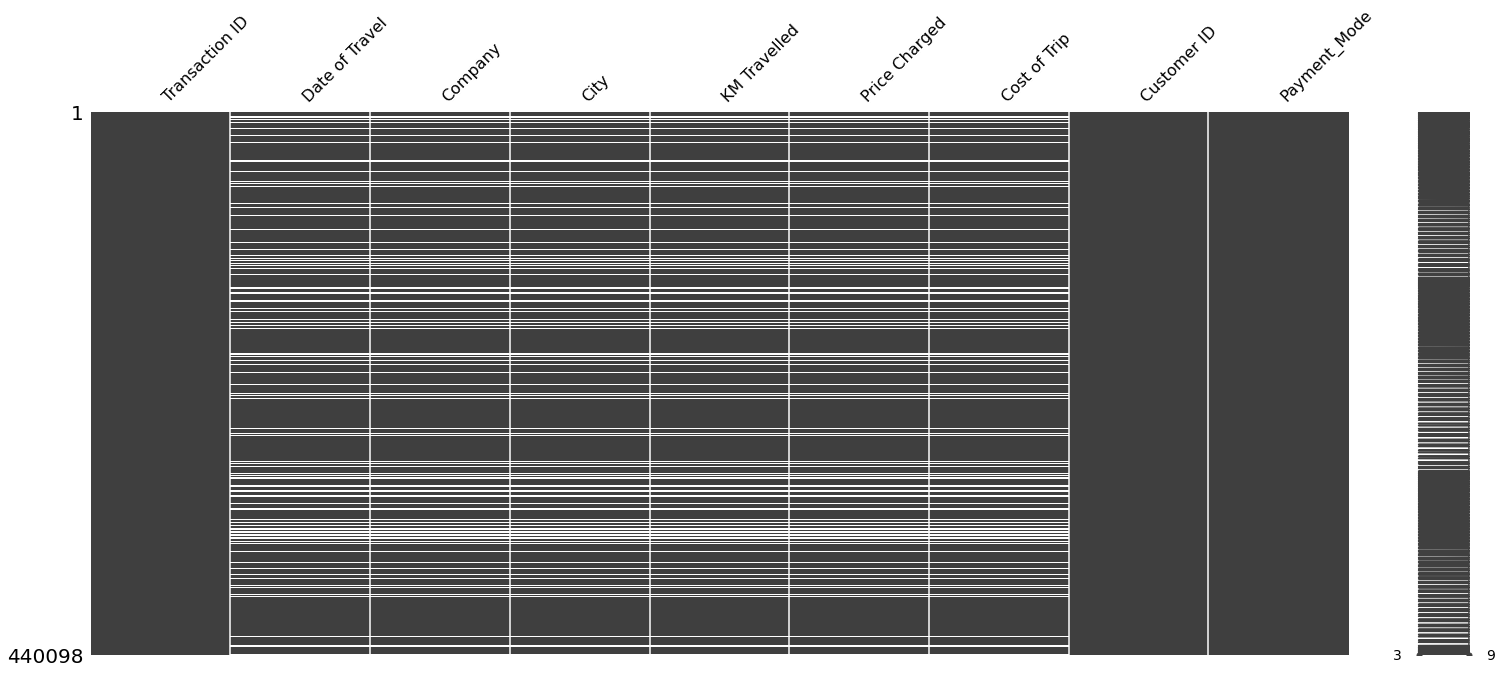

In [22]:
msno.matrix(df_cab_trans)
plt.show()

In [23]:
df_cab_trans['City'].isnull().sum()

80706

In [24]:
df = df_cab_trans.merge(df_customer, on ='Customer ID', how='outer').merge(df_city, on = 'City', how='outer')

In [25]:
df.shape

(440099, 14)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440099 entries, 0 to 440098
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      440098 non-null  float64
 1   Date of Travel      359392 non-null  float64
 2   Company             359392 non-null  object 
 3   City                359393 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         440098 non-null  float64
 8   Payment_Mode        440098 non-null  object 
 9   Gender              440098 non-null  object 
 10  Age                 440098 non-null  float64
 11  Income (USD/Month)  440098 non-null  float64
 12  Population          359393 non-null  float64
 13  Users               359393 non-null  float64
dtypes: float64(10), object(4)
memory usage: 50.4+ MB


In [27]:
df[(df['Company'].isnull() & ~df['City'].isnull())]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
440098,NaN,NaN,NaN,SAN FRANCISCO CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,629591.0,213609.0


In [28]:
df[df['City'] == 'SAN FRANCISCO CA']

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
440098,NaN,NaN,NaN,SAN FRANCISCO CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,629591.0,213609.0


### Raw Master Dataset

Considering there are no rides registered on SAN FRANCISCO CA, the corresponding observation was dropped from the master dataset by joining the cities dataset with a left join.

In [29]:
df_raw = df_cab_trans.merge(df_customer, on ='Customer ID', how='outer').merge(df_city, on = 'City', how='left')

In [30]:
df_raw.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24701.0
1,10351127,43302.0,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24701.0
2,10412921,43427.0,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24701.0
3,10000012,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24701.0
4,10320494,43211.0,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24701.0


In [31]:
df_raw.nunique()

Transaction ID        440098
Date of Travel          1095
Company                    2
City                      19
KM Travelled             874
Price Charged          99176
Cost of Trip           16291
Customer ID            49171
Payment_Mode               2
Gender                     2
Age                       48
Income (USD/Month)     23341
Population                19
Users                     19
dtype: int64

## Missing data
The missing data doesn't seem to be influenced by the values of the available variables. The distributions of the null values in the available variables are similar to those of the same variables considering the non-null values. Taking this into account (and the lack of extra information about the datasets), it is proposed that the missing data mechanism is completely at random (**MCAR**). Hence, imputation methods, as well as elimination of observations with null values are plausible.

In [32]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440098 entries, 0 to 440097
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      440098 non-null  int64  
 1   Date of Travel      359392 non-null  float64
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         440098 non-null  int64  
 8   Payment_Mode        440098 non-null  object 
 9   Gender              440098 non-null  object 
 10  Age                 440098 non-null  int64  
 11  Income (USD/Month)  440098 non-null  int64  
 12  Population          359392 non-null  float64
 13  Users               359392 non-null  float64
dtypes: float64(6), int64(4), object(4)
memory usage: 50.4+ MB


In [33]:
df_raw['City'].isnull().sum()/df_raw.shape[0]

0.18338188312603101

In [34]:
df_nulls = df_raw[df_raw['Date of Travel'].isnull()]
df_nulls.shape

(80706, 14)

Card    48487
Cash    32219
Name: Payment_Mode, dtype: int64


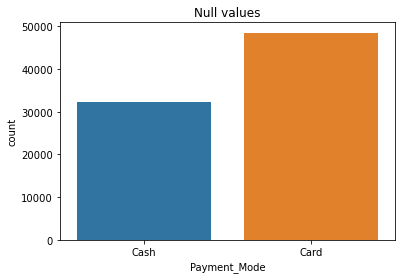

In [35]:
# Ordenar las barras
print(df_nulls['Payment_Mode'].value_counts())
sns.countplot(data=df_nulls, x='Payment_Mode',
              order=['Cash', 'Card'])
plt.title('Null values')
plt.show()

Card    263991
Cash    176107
Name: Payment_Mode, dtype: int64


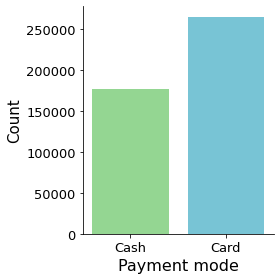

In [36]:
print(df['Payment_Mode'].value_counts())

xlab_fsize = 16
ylab_fsize = 15
tcks_fsize = 13

fig, ax = plt.subplots(figsize=(4, 4))

g = sns.countplot(data=df, x='Payment_Mode',
                  order=['Cash', 'Card'],
                  palette=['#89E187', '#68CEE5'])

g.tick_params(labelsize=tcks_fsize, left=True)
g.set_xlabel('Payment mode', fontsize=xlab_fsize)
g.set_ylabel('Count', fontsize=ylab_fsize)
g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False)
plt.tight_layout()

plt.show()

#fig.savefig('../../week_3/figures/1_1_bars_payment_mode.png', dpi=300)

Male      50699
Female    30007
Name: Gender, dtype: int64


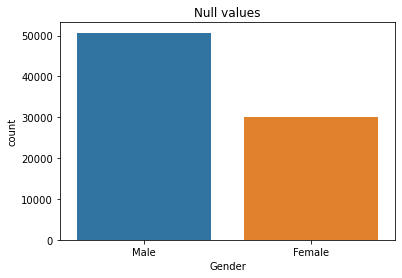

In [37]:
print(df_nulls['Gender'].value_counts())
sns.countplot(data=df_nulls, x='Gender')
plt.title('Null values')
plt.show()

Male      256611
Female    183487
Name: Gender, dtype: int64


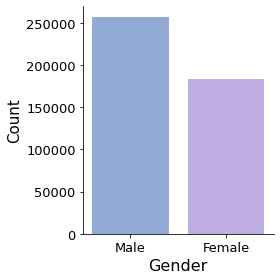

In [38]:
print(df['Gender'].value_counts())

xlab_fsize = 16
ylab_fsize = 15
tcks_fsize = 13

fig, ax = plt.subplots(figsize=(4, 4))

g = sns.countplot(data=df, x='Gender',
                  order=['Male', 'Female'],
                  palette=['#87A6E1', '#BBA6E9'])

g.tick_params(labelsize=tcks_fsize, left=True)
g.set_xlabel('Gender', fontsize=xlab_fsize)
g.set_ylabel('Count', fontsize=ylab_fsize)
g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False)
plt.tight_layout()

plt.show()

#fig.savefig('../../week_3/figures/1_2_bars_gender.png', dpi=300)

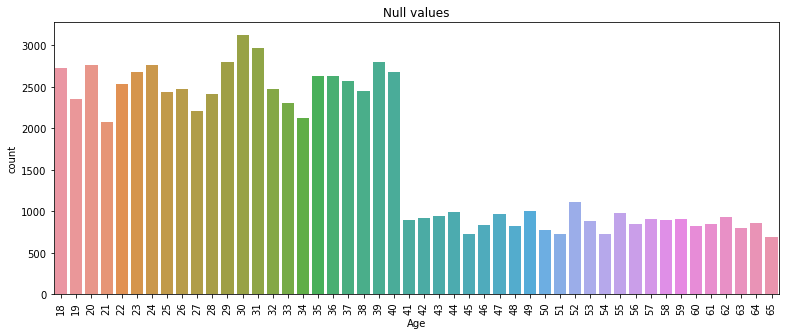

In [39]:
fig, ax = plt.subplots(figsize=(13, 5))
sns.countplot(data=df_nulls, x='Age')
plt.title('Null values')
plt.xticks(rotation=90)
plt.show()

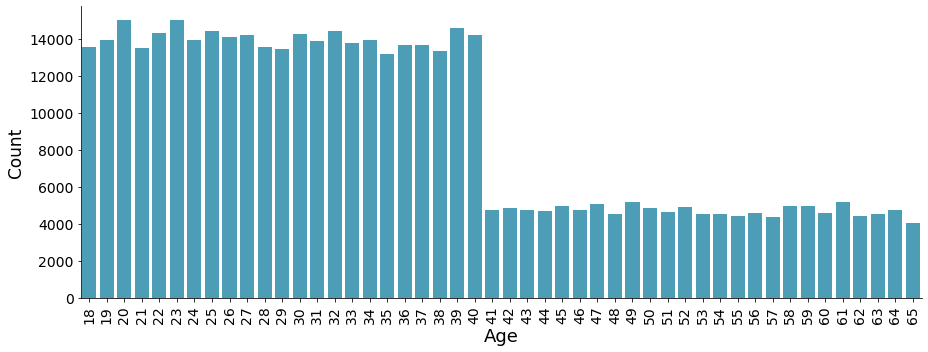

In [40]:
xlab_fsize = 18
ylab_fsize = 17
tcks_fsize = 14

#plt.clf()
fig, ax = plt.subplots(figsize=(13, 5))

g = sns.countplot(data=df, x='Age', color = '#3BA7C6')

g.tick_params(labelsize=tcks_fsize, left=True)
g.set_xlabel('Age', fontsize=xlab_fsize)
g.set_ylabel('Count', fontsize=ylab_fsize)
g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False)
plt.xticks(rotation=90)
ax.set_xticklabels(['{:.0f}'.format(float(t.get_text())) for t in ax.get_xticklabels()])
plt.tight_layout()

plt.show()

#fig.savefig('../../week_3/figures/7_2_bars_age.png', dpi=300)

### Master dataset

Given that the percentage of observations with missing data is near to 20% and the remaining number of observations is greater than 350,000, for simplicity, **the observations with null values were dropped from the Master dataset**.

In [41]:
df = df_raw[~df_raw['City'].isnull()]

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 440097
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  float64
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  float64
 13  Users               359392 non-null  float64
dtypes: float64(6), int64(4), object(4)
memory usage: 41.1+ MB


In [43]:
df.loc[:, ['Date of Travel']] = df['Date of Travel'].astype(int)

c:\python38\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [44]:
df.loc[:, ['Date of Travel']] = (datetime(1900, 1, 1).toordinal() + df['Date of Travel'] - 2).apply(datetime.fromordinal)

In [45]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24701.0
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24701.0
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24701.0
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24701.0
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24701.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 440097
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  float64       
 13  Users               359392 no

In [47]:
# Exporting the dataframe to a csv file
#df.to_csv('master_df_g2m_cab_data.csv')

## EDA

There is a big difference on the number of rides between both cab companies. There are a lot more rides for Yellow Cab.

Counts: 
Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

Proportions: 
Yellow Cab    0.764294
Pink Cab      0.235706
Name: Company, dtype: float64


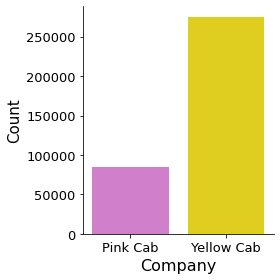

In [48]:
print('Counts: \n%s\n' % df['Company'].value_counts())
print('Proportions: \n%s' % (df['Company'].value_counts()/df.shape[0]))

xlab_fsize = 16
ylab_fsize = 15
tcks_fsize = 13

fig, ax = plt.subplots(figsize=(4, 4))

g = sns.countplot(data=df, x='Company',
                  order=['Pink Cab', 'Yellow Cab'],
                  palette=['#DE71D7', '#FFE800'])

g.tick_params(labelsize=tcks_fsize, left=True)
g.set_xlabel('Company', fontsize=xlab_fsize)
g.set_ylabel('Count', fontsize=ylab_fsize)
g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False)
plt.tight_layout()

plt.show()

#fig.savefig('../../week_3/figures/1_3_bars_company.png', dpi=300)

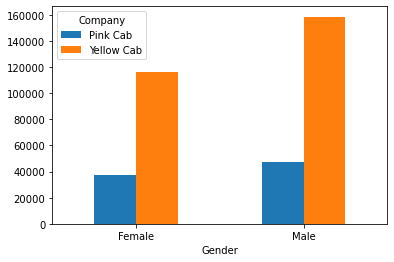

In [49]:
pd.crosstab(df['Gender'], df['Company']).plot(kind='bar', rot=0)
plt.show()

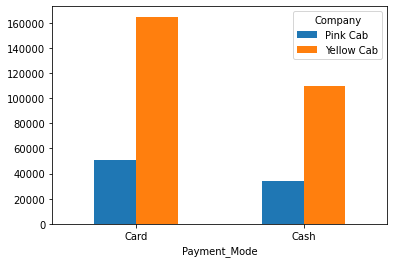

In [50]:
pd.crosstab(df['Payment_Mode'], df['Company']).plot(kind='bar', rot=0)
plt.show()

There is a big difference in rides considering the different cities. New York is the city with the bigger amount of rides.

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64


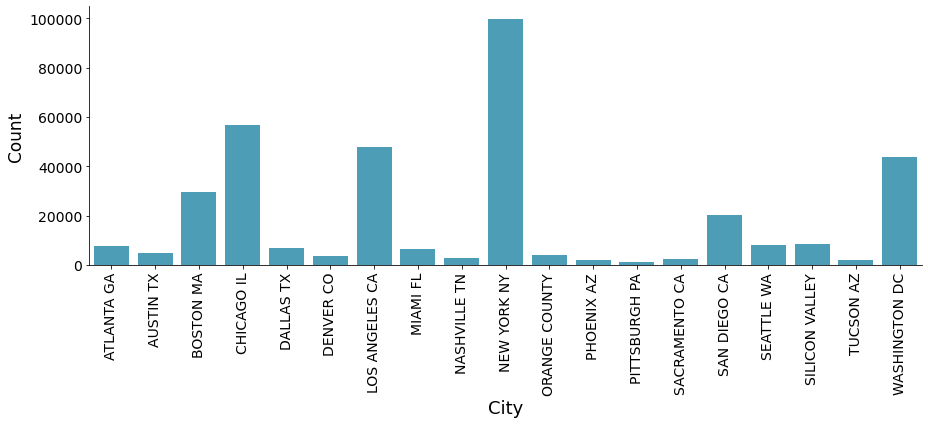

In [51]:
print(df['City'].value_counts())

xlab_fsize = 18
ylab_fsize = 17
tcks_fsize = 14

fig, ax = plt.subplots(figsize=(13, 6))
g = sns.countplot(data=df, x='City', color='#3BA7C6')
g.tick_params(labelsize=tcks_fsize, left=True)
g.set_xlabel('City', fontsize=xlab_fsize)
g.set_ylabel('Count', fontsize=ylab_fsize)
g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#fig.savefig('../../week_3/figures/1_4_bars_age.png', dpi=300)

In examining the number of rides per city, and divided by company, it is notorious that, in general, Yellow Cab had a bigger amount of rides. Specially, in New York, Chicago, Washington, and Boston.

In [52]:
pd.crosstab(df['City'], df['Company'])

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,1762,5795
AUSTIN TX,1868,3028
BOSTON MA,5186,24506
CHICAGO IL,9361,47264
DALLAS TX,1380,5637
DENVER CO,1394,2431
LOS ANGELES CA,19865,28168
MIAMI FL,2002,4452
NASHVILLE TN,1841,1169


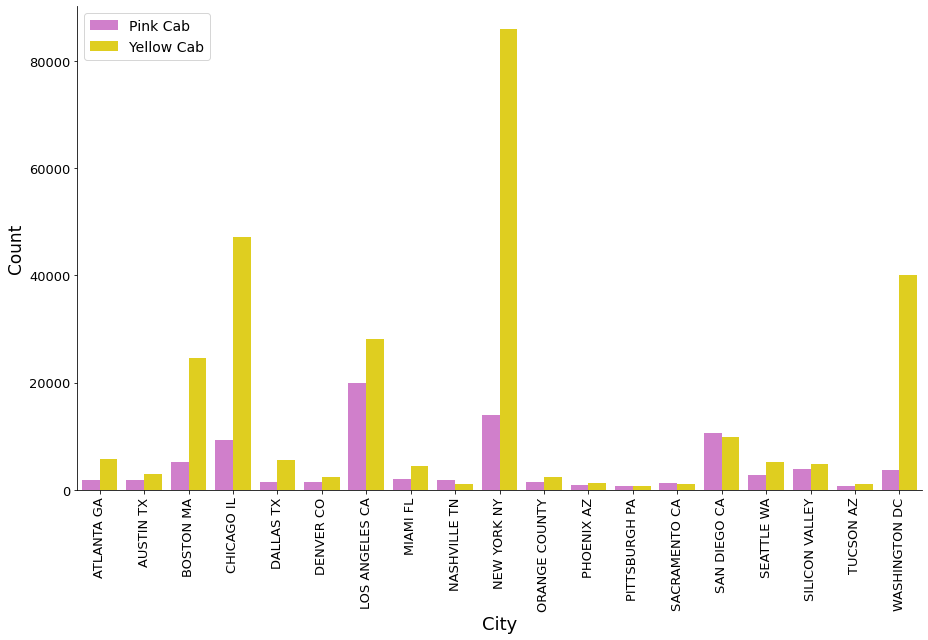

In [53]:
xlab_fsize = 18
ylab_fsize = 17
tcks_fsize = 13
lgnd_size = 14

#plt.clf()
fig, ax = plt.subplots(figsize=(13, 9))

g = sns.countplot(data=df, x='City', hue='Company',
                  palette=['#DE71D7', '#FFE800'])

g.tick_params(labelsize=tcks_fsize, left=True)
g.set_xlabel('City', fontsize=xlab_fsize)
g.set_ylabel('Count', fontsize=ylab_fsize)
g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False)
g.legend(loc=2, prop={'size': lgnd_size})
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

#fig.savefig('../../week_3/figures/2_bars_age_x_company.png', dpi=500)

In [54]:
def bin_width(df, var_name):
    '''
    Function that returns the bin width for a specied column on a data frame.
    Parameters:
        -df: Pandas data frame.
        -var_name: Column name.
    '''
    x = var_name
    q1 = df[x].quantile(0.25)
    q3 = df[x].quantile(0.75)
    iqr = q3-q1
    bw = 2 * iqr / df.shape[0]**(1/3)
    return bw

**Hypothesis 1**: The average of monthly income is going to be different between companies.

Income (USD/Month) seems to have a right skewd distribution. Also, It appears there are two different groups of people considering their monthly income. When dividing the data with the Company variable there seems to be no differences between the amount of money earned monthly by the customers of each cab company. There seems to be not enough evidence that supports the hypothesis. The distribution of the monthly income seems pretty similar.

In [55]:
def ind_boxplot(dataframe, v, xlab_fsize=18, tcks_fsize=15):
    '''
    Function that generates a customized white boxplot of one variable.
    Parameters:
        -dataframe: DataFrame to be used.
        -v: Variable of interest.
        -xlab_fsize: Size of the x axis label's font.
        -tcks_fsize: Size of the ticks label's font.
    '''
    g = sns.boxplot(data = df, x=v, 
                medianprops=dict(color="black", alpha=1),
                flierprops=dict(markerfacecolor='black', marker='d'),
                boxprops=dict(facecolor='white', edgecolor='black', alpha=0.8))
    g.tick_params(labelsize=tcks_fsize, left=True)
    g.set_xlabel(v, fontsize=xlab_fsize)
    return g

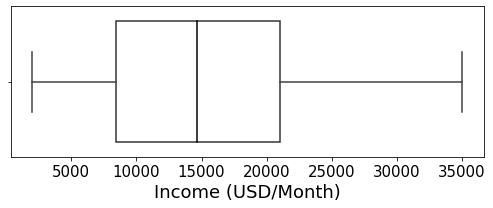

count    359392.000000
mean      15048.822937
std        7969.409482
min        2000.000000
25%        8424.000000
50%       14685.000000
75%       21035.000000
max       35000.000000
Name: Income (USD/Month), dtype: float64


In [56]:
v = 'Income (USD/Month)'

fig, ax = plt.subplots(figsize=(7, 3))
g = ind_boxplot(df, v)
plt.tight_layout()
plt.show()

print(df[v].describe())

#fig.savefig('../../week_3/figures/3_1_boxp_income.png', dpi=300)

In [57]:
def customized_hist(dataframe, v, xlab_fsize=18, ylab_fsize=17, tcks_fsize=14, color='#3BA7C6'):
    '''
    Function that creates a customized histogram. Requires custom bin_with() function.
    Parameters:
        -dataframe: DataFrame to be used.
        -v: Variable of interest.
        -xlab_fsize: Size of the x axis label's font.
        -ylab_fsize: Size of the y axis label's font.
        -tcks_fsize: Size of the ticks label's font.
        -color: Color of the bars.
    '''
    bw = bin_width(df, v)
    g = sns.histplot(data=df, x=v, binwidth=bw, color = '#3BA7C6', element='step')
    g.tick_params(labelsize=tcks_fsize, left=True)
    g.set_xlabel(v, fontsize=xlab_fsize)
    g.set_ylabel('Count', fontsize=ylab_fsize)
    g.spines['right'].set_visible(False)
    g.spines['top'].set_visible(False)
    return g

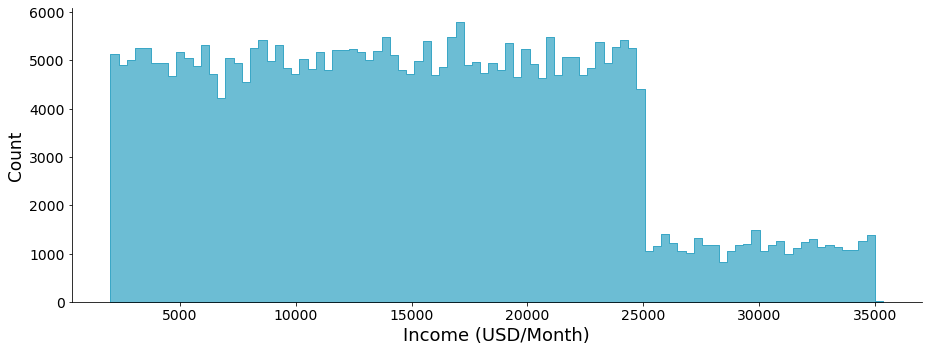

In [58]:
v = 'Income (USD/Month)'

fig, ax = plt.subplots(figsize=(13, 5))
g = customized_hist(df, v)
plt.tight_layout()
plt.show()

#fig.savefig('../../week_3/figures/3_2_hist_income.png', dpi=300)

In [59]:
def comp_boxplot(dataframe, x, y, xlab_fsize=16, ylab_fsize=15, tcks_fsize=13, colors=['#DE71D7', '#FFE800']):
    '''
    Function that creates a customized boxplot for comparing between two categories from a variable.
    Parameters:
        -dataframe: DataFrame to be used.
        -x: Quantitative variable of interest.
        -y: Categorical variable for comparisons.
        -xlab_fsize: Size of the x axis label's font.
        -ylab_fsize: Size of the y axis label's font.
        -tcks_fsize: Size of the ticks label's font.
        -colors: Colors to be used for the categories.
    '''
    g = sns.boxplot(data = df, x=x, y=y, 
                medianprops=dict(color="black", alpha=1),
                flierprops=dict(markerfacecolor='black', marker='d'),
                boxprops=dict(edgecolor='black', alpha=0.8),
                palette=['#DE71D7', '#FFE800'])

    g.tick_params(labelsize=tcks_fsize, left=True)
    g.set_xlabel(x, fontsize=xlab_fsize)
    g.set_ylabel(y, fontsize=ylab_fsize)
    g.spines['right'].set_visible(False)
    g.spines['top'].set_visible(False)
    return g

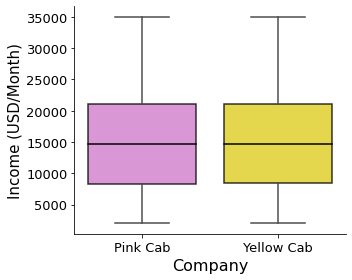

count    359392.000000
mean      15048.822937
std        7969.409482
min        2000.000000
25%        8424.000000
50%       14685.000000
75%       21035.000000
max       35000.000000
Name: Income (USD/Month), dtype: float64


In [60]:
x = 'Company'
y = 'Income (USD/Month)'

fig, ax = plt.subplots(figsize=(5, 4))
g = comp_boxplot(df, x, y)
plt.tight_layout()
plt.show()

print(df[v].describe())

#fig.savefig('../../week_3/figures/3_3_boxp_income_x_company.png', dpi=300)

In [61]:
v = 'Income (USD/Month)'
d1 = df[df['Company'] == 'Pink Cab'][v]
d2 = df[df['Company'] == 'Yellow Cab'][v]

print('Means')
print('Pink Cab: %f' %
      d1.mean())
print('Yellow Cab: %f' %
      d2.mean())

stat, p = ttest_ind(d1, d2)
print(ttest_ind(d1, d2))
print('p-value = %.4f' % p)
print('The means of %s are equal at the 0.05 level (p>0.05)' %
      v)

Means
Pink Cab: 15059.047137
Yellow Cab: 15045.669817
Ttest_indResult(statistic=0.42711269788899964, pvalue=0.6692975005750659)
p-value = 0.6693
The means of Income (USD/Month) are equal at the 0.05 level (p>0.05)


**Hypothesis 2**: The amount of kilometers traveled is going to be different between the cab companies.

The KM Travelled variable seems to have a distribution with a slight skew to the right. The least common trips consist of big distances. Between the two companies, there seems to be no big differences on the kilometers traveled. Hence, there seems to be no sufficient evidence to support the hypothesis. The two cab companies seem to have both short and long trips.

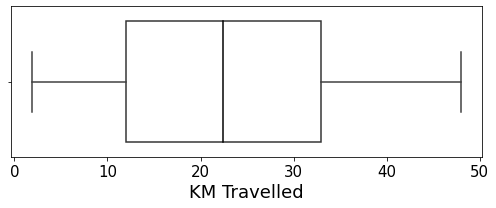

count    359392.000000
mean         22.567254
std          12.233526
min           1.900000
25%          12.000000
50%          22.440000
75%          32.960000
max          48.000000
Name: KM Travelled, dtype: float64


In [62]:
v = 'KM Travelled'

fig, ax = plt.subplots(figsize=(7, 3))
g = ind_boxplot(df, v)
plt.tight_layout()
plt.show()

print(df[v].describe())

#fig.savefig('../../week_3/figures/4_1_boxp_km.png', dpi=300)

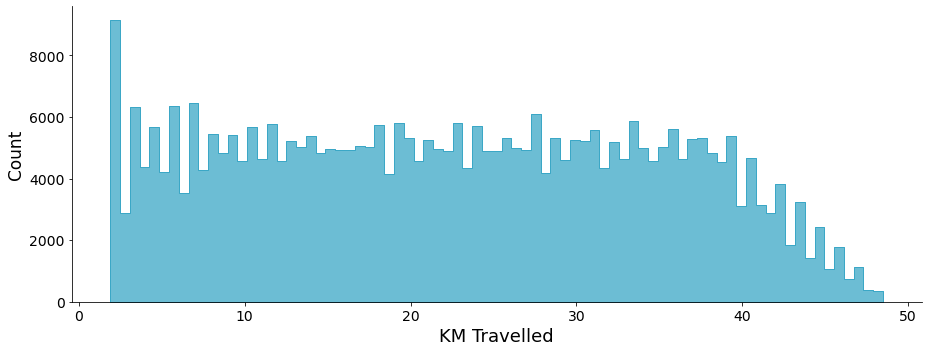

In [63]:
v = 'KM Travelled'

fig, ax = plt.subplots(figsize=(13, 5))
g = customized_hist(df, v)
plt.tight_layout()
plt.show()

#fig.savefig('../../week_3/figures/4_2_hist_km.png', dpi=300)

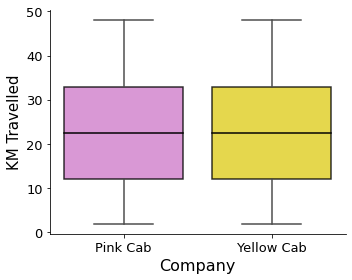

count    359392.000000
mean         22.567254
std          12.233526
min           1.900000
25%          12.000000
50%          22.440000
75%          32.960000
max          48.000000
Name: KM Travelled, dtype: float64


In [64]:
x = 'Company'
y = 'KM Travelled'

fig, ax = plt.subplots(figsize=(5, 4))
g = comp_boxplot(df, x, y)
plt.tight_layout()
plt.show()

print(df[v].describe())

#fig.savefig('../../week_3/figures/4_3_boxp_km_x_company.png', dpi=300)

In [65]:
v = 'KM Travelled'
d1 = df[df['Company'] == 'Pink Cab'][v]
d2 = df[df['Company'] == 'Yellow Cab'][v]

print('Means')
print('Pink Cab: %f' %
      d1.mean())
print('Yellow Cab: %f' %
      d2.mean())

stat, p = ttest_ind(d1, d2)
print(ttest_ind(d1, d2))
print('p-value = %.4f' % p)
print('The means of %s are equal at the 0.05 level (p>0.05)' %
      v)

Means
Pink Cab: 22.559917
Yellow Cab: 22.569517
Ttest_indResult(statistic=-0.1996753105282756, pvalue=0.8417346372230821)
p-value = 0.8417
The means of KM Travelled are equal at the 0.05 level (p>0.05)


**Hypothesis 3**: The averages on Cost of Trip are going to be different between both companies.

The distribution of the Cost of Trip variable is right skewed, with no outliers. When dividing by company, Yellow Cab showed higher values. Also, the differences in means was statistically significant (p<0.05). Hence, the evidence seems to support the hypothesis.

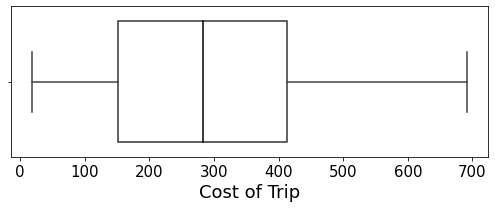

count    359392.000000
mean        286.190113
std         157.993661
min          19.000000
25%         151.200000
50%         282.480000
75%         413.683200
max         691.200000
Name: Cost of Trip, dtype: float64


In [66]:
v = 'Cost of Trip'

fig, ax = plt.subplots(figsize=(7, 3))
g = ind_boxplot(df, v)
plt.tight_layout()
plt.show()

print(df[v].describe())

#fig.savefig('../../week_3/figures/5_1_boxp_cost.png', dpi=300)

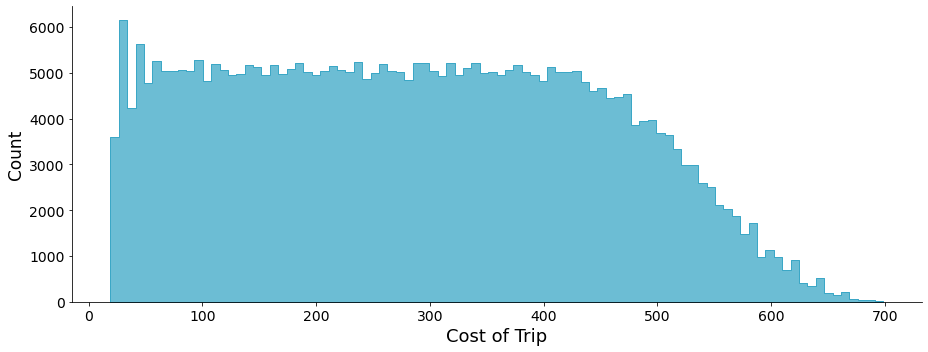

In [67]:
v = 'Cost of Trip'

fig, ax = plt.subplots(figsize=(13, 5))
g = customized_hist(df, v)
plt.tight_layout()
plt.show()

#fig.savefig('../../week_3/figures/5_2_hist_cost.png', dpi=300)

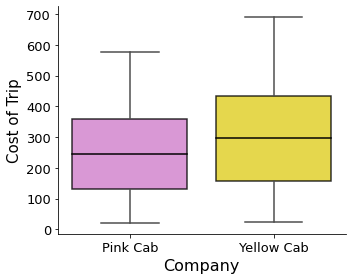

count    359392.000000
mean        286.190113
std         157.993661
min          19.000000
25%         151.200000
50%         282.480000
75%         413.683200
max         691.200000
Name: Cost of Trip, dtype: float64


In [68]:
x = 'Company'
y = 'Cost of Trip'

fig, ax = plt.subplots(figsize=(5, 4))
g = comp_boxplot(df, x, y)
plt.tight_layout()
plt.show()

print(df[v].describe())

#fig.savefig('../../week_3/figures/5_3_boxp_cost_x_company.png', dpi=300)

In [69]:
v = 'Cost of Trip'
d1 = df[df['Company'] == 'Pink Cab'][v]
d2 = df[df['Company'] == 'Yellow Cab'][v]

print('Means')
print('Pink Cab: %f' %
      d1.mean())
print('Yellow Cab: %f' %
      d2.mean())

stat, p = ttest_ind(d1, d2)
print(ttest_ind(d1, d2))
print('p-value = %.4f' % p)
print('The means of %s are different at the 0.05 level (p<0.05)' %
      v)

Means
Pink Cab: 248.148682
Yellow Cab: 297.922004
Ttest_indResult(statistic=-80.88610180101641, pvalue=0.0)
p-value = 0.0000
The means of Cost of Trip are different at the 0.05 level (p<0.05)


**Hypothesis 4**: The price charged is going to be different on average for the two companies.

The Price Charged variable showed a right skewd distribution with 5,958 outliers (1.66%). When divided by company, the distributions are different. In particular, Yellow Cab seem to be more expensive. The differences between the averages on both companies were statistically significant (p<0.05). Hence, the evidence seem to support the hypothesis.

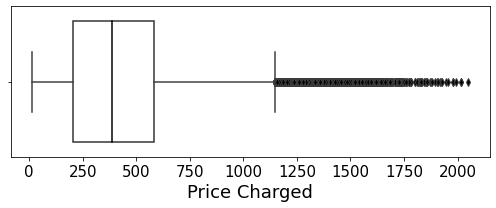

count    359392.000000
mean        423.443311
std         274.378911
min          15.600000
25%         206.437500
50%         386.360000
75%         583.660000
max        2048.030000
Name: Price Charged, dtype: float64


In [70]:
v = 'Price Charged'

fig, ax = plt.subplots(figsize=(7, 3))
g = ind_boxplot(df, v)
plt.tight_layout()
plt.show()

print(df[v].describe())

#fig.savefig('../../week_3/figures/6_1_boxp_price.png', dpi=300)

In [71]:
v = 'Price Charged'
q1 = df[v].quantile(0.25)
q3 = df[v].quantile(0.75)
iqr = q3-q1

ol = (df[v] > q3+1.5*iqr).sum()
print(f'{v} has {ol} outliers.')
print(f"That´s {round(ol/df[v].shape[0]*100, 2)}% of the data.")

Price Charged has 5958 outliers.
That´s 1.66% of the data.


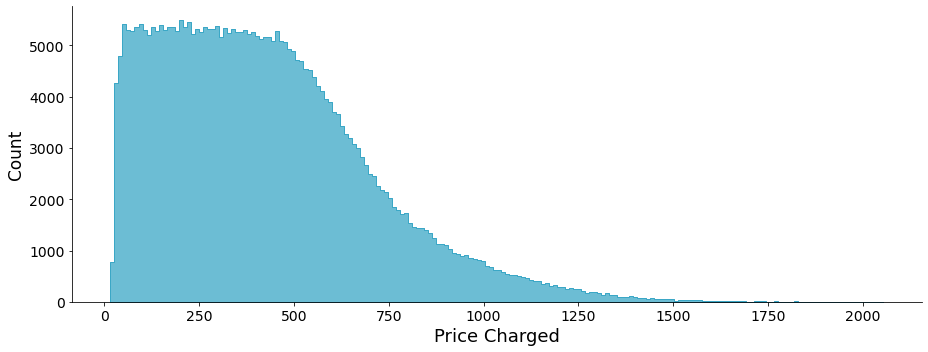

In [72]:
v = 'Price Charged'

fig, ax = plt.subplots(figsize=(13, 5))
g = customized_hist(df, v)
plt.tight_layout()
plt.show()

#fig.savefig('../../week_3/figures/6_2_hist_price.png', dpi=300)

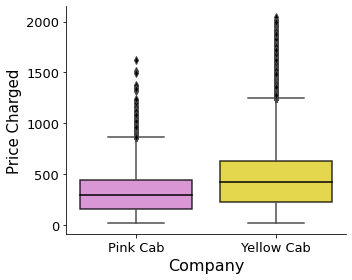

count    359392.000000
mean        423.443311
std         274.378911
min          15.600000
25%         206.437500
50%         386.360000
75%         583.660000
max        2048.030000
Name: Price Charged, dtype: float64


In [73]:
x = 'Company'
y = 'Price Charged'

fig, ax = plt.subplots(figsize=(5, 4))
g = comp_boxplot(df, x, y)
plt.tight_layout()
plt.show()

print(df[v].describe())

#fig.savefig('../../week_3/figures/6_3_boxp_price_x_company.png', dpi=300)

In [74]:
v = 'Price Charged'
d1 = df[df['Company'] == 'Pink Cab'][v]
d2 = df[df['Company'] == 'Yellow Cab'][v]

print('Means')
print('Pink Cab: %f' %
      d1.mean())
print('Yellow Cab: %f' %
      d2.mean())
stat, p = ttest_ind(d1, d2)
print(ttest_ind(d1, d2))
print('p-value = %.4f' % p)
print('The means of %s are different at the 0.05 level (p<0.05)' %
      v)

Means
Pink Cab: 310.800856
Yellow Cab: 458.181990
Ttest_indResult(statistic=-140.3722440435425, pvalue=0.0)
p-value = 0.0000
The means of Price Charged are different at the 0.05 level (p<0.05)


**Hypothesis 5**: The average age of the customers is going to be different between the two companies.

The distribution of Age was right skewd. When divided by company, there seemed to be no big differences between the distributions. Also, the differences between the means were not statistically significant. Hence, the evidence doesn´t seem to support the hypothesis.

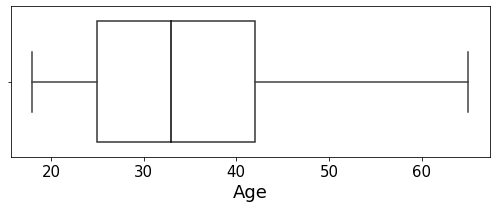

count    359392.000000
mean         35.336705
std          12.594234
min          18.000000
25%          25.000000
50%          33.000000
75%          42.000000
max          65.000000
Name: Age, dtype: float64


In [75]:
v = 'Age'

fig, ax = plt.subplots(figsize=(7, 3))
g = ind_boxplot(df, v)
plt.tight_layout()
plt.show()

print(df[v].describe())

#fig.savefig('../../week_3/figures/7_1_boxp_age.png', dpi=300)

In [76]:
pd.crosstab(df['Age'], df['Company'])

Company,Pink Cab,Yellow Cab
Age,,
18,2676,8170
19,2821,8770
20,2853,9376
21,2590,8841
22,2783,9013
23,2913,9414
24,2670,8481
25,2814,9159
26,2894,8761


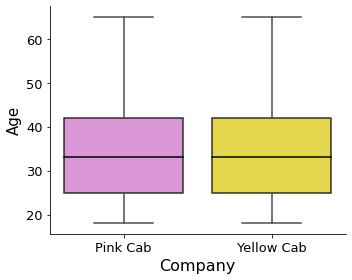

count    359392.000000
mean         35.336705
std          12.594234
min          18.000000
25%          25.000000
50%          33.000000
75%          42.000000
max          65.000000
Name: Age, dtype: float64


In [77]:
x = 'Company'
y = 'Age'

fig, ax = plt.subplots(figsize=(5, 4))
g = comp_boxplot(df, x, y)
plt.tight_layout()
plt.show()

print(df[v].describe())

#fig.savefig('../../week_3/figures/7_3_boxp_age_x_company.png', dpi=300)

In [78]:
v = 'Age'
d1 = df[df['Company'] == 'Pink Cab'][v]
d2 = df[df['Company'] == 'Yellow Cab'][v]

print('Means')
print('Pink Cab: %f' %
      d1.mean())
print('Yellow Cab: %f' %
      d2.mean())
stat, p = ttest_ind(d1, d2)
print(ttest_ind(d1, d2))
print('p-value = %.4f' % p)
print('The means of %s are different at the 0.05 level (p<0.05)' %
      v)

Means
Pink Cab: 35.322414
Yellow Cab: 35.341112
Ttest_indResult(statistic=-0.3777700356771092, pvalue=0.7056016582376317)
p-value = 0.7056
The means of Age are different at the 0.05 level (p<0.05)


Examining the relation between KM Travelled, Price Charge, and Cost of Trip on the respective scatterplots, it was observed heteroscedasticity.

In general, Yellow cab seems to be more expensive than Pink cab.

In [79]:
def comp_scatterp(dataframe, x, y, cat_v, xlab_fsize=16, ylab_fsize=15, tcks_fsize=13, lgnd_size=13, view_lgnd=True, colors=['#DE71D7', '#FFE800']):
    '''
    Function that creates a customized scatterplot for comparing between two categories from a variable.
    Parameters:
        -dataframe: DataFrame to be used.
        -x: First quantitative variable of interest.
        -y: Second quantitative variable of interest.
        -cat_v: Categorical variable for comparisons.
        -xlab_fsize: Size of the x axis label's font.
        -ylab_fsize: Size of the y axis label's font.
        -tcks_fsize: Size of the ticks label's font.
        -lgnd_size: Size of the legend.
        -view_lgnd: Activate legend.
        -colors: Colors to be used for the categories.
    '''
    g = sns.scatterplot(data=df, x=x, y=y, hue='Company', alpha=0.5, palette=colors)
    g.tick_params(labelsize=tcks_fsize, left=True)
    g.set_xlabel(x, fontsize=xlab_fsize)
    g.set_ylabel(y, fontsize=ylab_fsize)
    g.legend(loc=2, prop={'size': lgnd_size}).set_visible(view_lgnd)
    g.spines['right'].set_visible(False)
    g.spines['top'].set_visible(False)
    
    return g

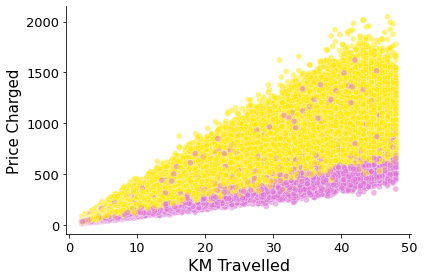

Correlation coeficient: 0.84


In [135]:
x='KM Travelled'
y='Price Charged'
cat_v = 'Company'

fig, ax = plt.subplots(figsize=(6, 4))
g = comp_scatterp(df, x, y, cat_v, view_lgnd=False)
plt.tight_layout()
plt.show()

print(f'Correlation coeficient: {round(df[x].corr(df[y]), 2)}')

#fig.savefig('../../week_3/figures/8_1_scatter_kmXprice_x_company.png', dpi=300)

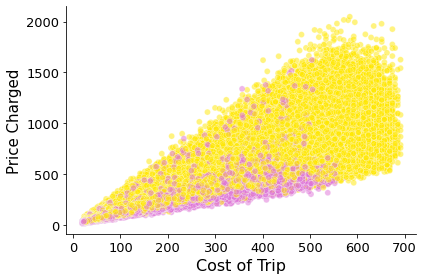

Correlation coeficient: 0.86


In [136]:
x='Cost of Trip'
y='Price Charged'
cat_v = 'Company'

fig, ax = plt.subplots(figsize=(6, 4))
g = comp_scatterp(df, x, y, cat_v, view_lgnd=False)
plt.tight_layout()
plt.show()

print(f'Correlation coeficient: {round(df[x].corr(df[y]), 2)}')

#fig.savefig('../../week_3/figures/8_2_scatter_costXprice_x_company.png', dpi=300)

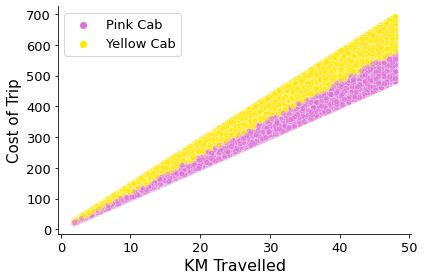

Correlation coeficient: 0.98


In [137]:
x='KM Travelled'
y='Cost of Trip'
cat_v = 'Company'

fig, ax = plt.subplots(figsize=(6, 4))
g = comp_scatterp(df, x, y, cat_v)
plt.tight_layout()
plt.show()

print(f'Correlation coeficient: {round(df[x].corr(df[y]), 2)}')

#fig.savefig('../../week_3/figures/8_3_scatter_kmXcost_x_company.png', dpi=300)

**Hypothesis 6**: There are going to be differences on the prices charged between cities.

When examining monthly income of customers, and kilometers traveled, there appeared to be no differences between cities. Nevertheless, there were differences for costs of trips, and prices charged, specially on the last one. It seems the largest prices are charged in New York. The evidence seems to support the hypothesis.

When dividing by company, it seems the largest prices are charged by Yellow Cab, with the possible exceptions of Miami and Tucson.

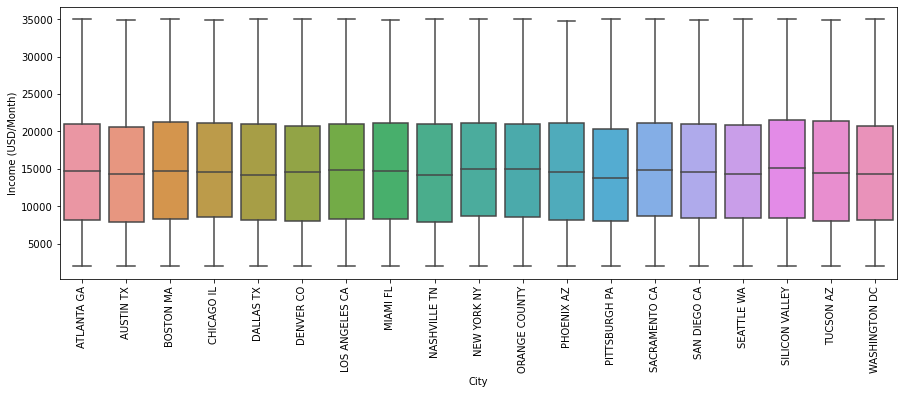

In [79]:
x = 'City'
y = 'Income (USD/Month)'

fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data=df, x=x, y=y)
plt.xticks(rotation=90)
plt.show()

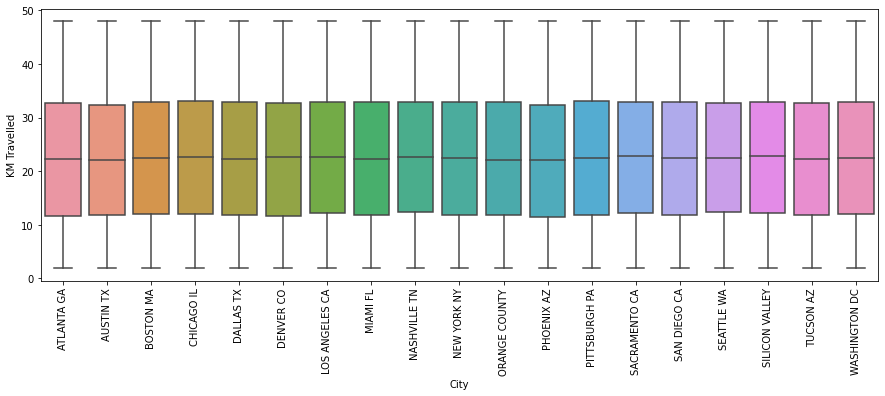

In [80]:
x = 'City'
y = 'KM Travelled'

fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data=df, x=x, y=y)
plt.xticks(rotation=90)
plt.show()

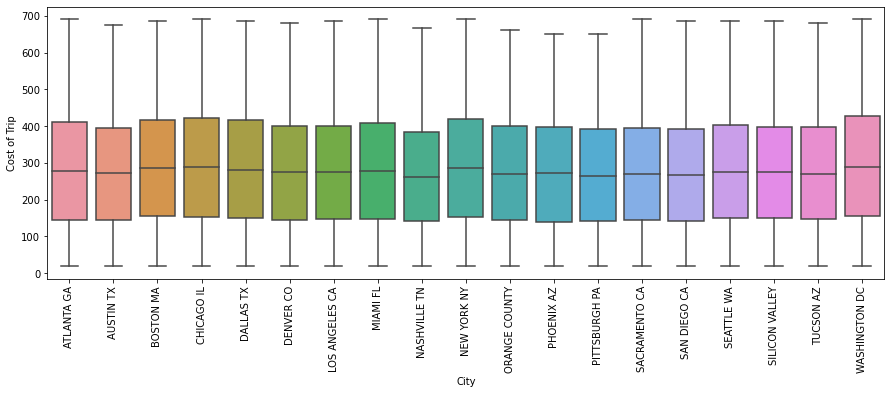

In [81]:
x = 'City'
y = 'Cost of Trip'

fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data=df, x=x, y=y)
plt.xticks(rotation=90)
plt.show()

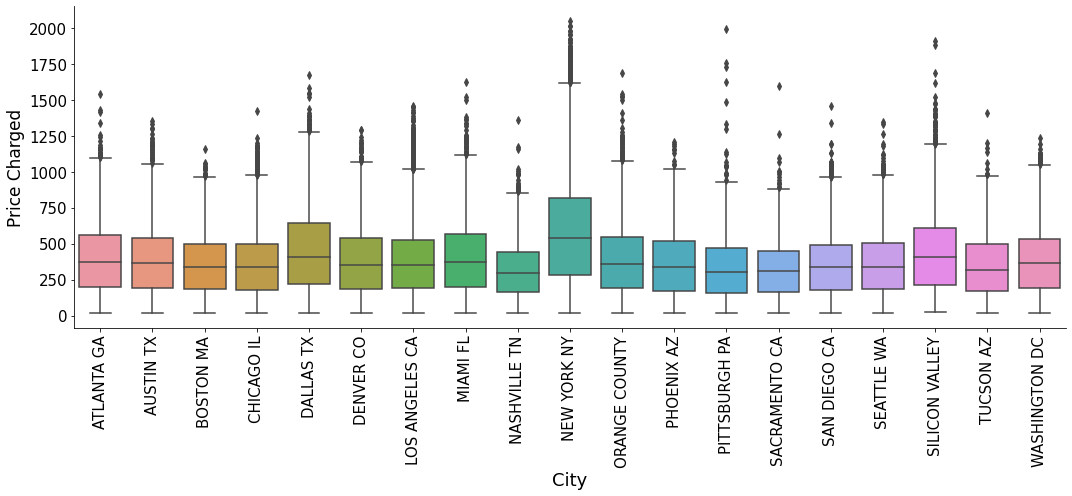

In [100]:
x = 'City'
y = 'Price Charged'

xlab_fsize = 18
ylab_fsize = 17
tcks_fsize = 15

fig, ax = plt.subplots(figsize=(15, 7))
g = sns.boxplot(data=df, x=x, y=y)
g.tick_params(labelsize=tcks_fsize, left=True)
g.set_xlabel(x, fontsize=xlab_fsize)
g.set_ylabel(y, fontsize=ylab_fsize)
g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#fig.savefig('../../week_3/figures/9_boxp_city_x_price.png', dpi=500)

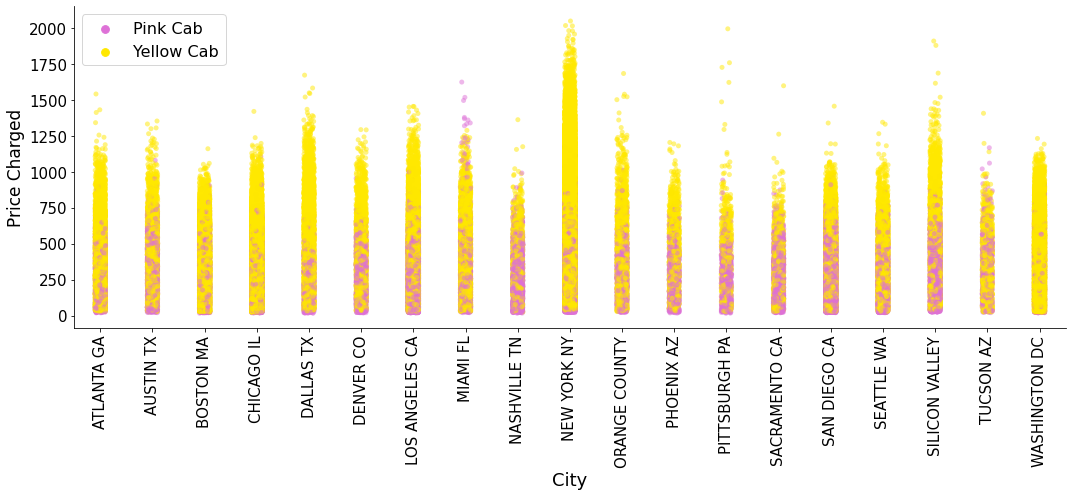

In [101]:
x = 'City'
y = 'Price Charged'

xlab_fsize = 18
ylab_fsize = 17
tcks_fsize = 15
lgnd_size = 16

fig, ax = plt.subplots(figsize=(15, 7))
g = sns.stripplot(data=df, x=x, y=y, hue='Company', alpha=0.5, palette=['#DE71D7', '#FFE800'])
g.tick_params(labelsize=tcks_fsize, left=True)
g.set_xlabel(x, fontsize=xlab_fsize)
g.set_ylabel(y, fontsize=ylab_fsize)
g.legend(loc=2, prop={'size': lgnd_size})
g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#fig.savefig('../../week_3/figures/10_stripp_cityXprice_x_company.png', dpi=500)

In [103]:
df_dates = pd.crosstab(df['Date of Travel'], df['Company'])
df_dates

Company,Pink Cab,Yellow Cab
Date of Travel,,
2016-01-02,41,140
2016-01-03,52,126
2016-01-04,4,21
2016-01-05,6,41
2016-01-06,23,86
...,...,...
2018-12-27,66,252
2018-12-28,217,626
2018-12-29,195,630


**Hypothesis 7**: Both companies are going to show seasonality.

Besides the absolute number of rides for each date, there seemed to be a similar pattern for both companies. It seemed that there was an annual growing tendency for both of them. There appeared to be seasonality for both, begining each year with few rides on the first months and more on the last ones. This supports the hypothesis.

Yellow Cab was superior on every date in terms of number of rides.

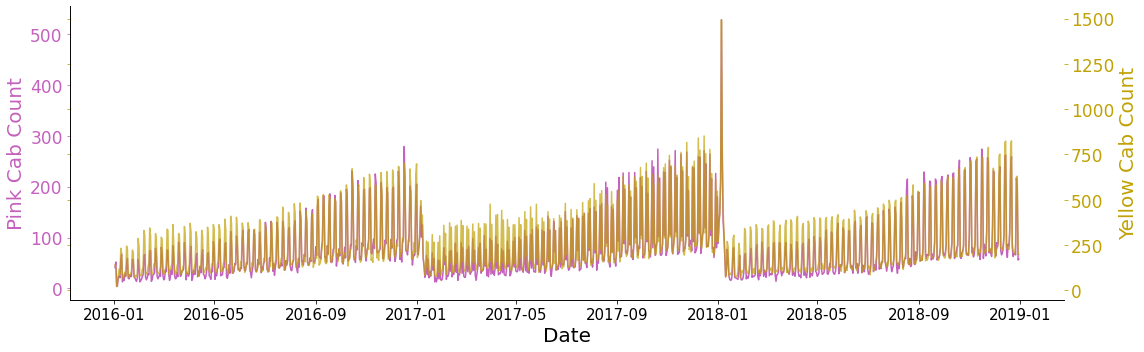

In [132]:
pcab_col = '#C462BD'
ycab_col = '#C1A206'

xlab_fsize = 20
ylab_fsize = 20
xtcks_fsize = 15
ytcks_fsize = 17

fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(df_dates.index, df_dates['Pink Cab'], color=pcab_col)
ax.tick_params('y', colors=pcab_col, labelsize=ytcks_fsize, left=True)
ax.tick_params('x', labelsize=xtcks_fsize)
ax.set_xlabel('Date', fontsize=xlab_fsize)
ax.set_ylabel('Pink Cab Count', fontsize=ylab_fsize, color=pcab_col)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


ax2 = ax.twinx()
ax2.plot(df_dates.index, df_dates['Yellow Cab'], color=ycab_col, alpha=0.7)
ax2.tick_params('y', colors=ycab_col, labelsize=tcks_fsize, left=True)
ax2.set_ylabel('Yellow Cab Count', fontsize=ylab_fsize, color=ycab_col)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

#fig.savefig('../../week_3/figures/11_1_dualaxis_times_price_x_company.png', dpi=500)

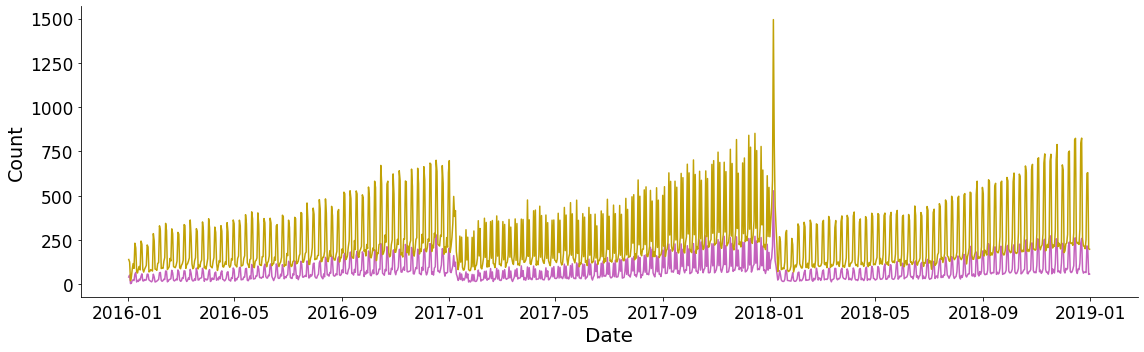

In [134]:
pcab_col = '#C462BD'
ycab_col = '#C1A206'

xlab_fsize = 20
ylab_fsize = 19
tcks_fsize = 17

fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(df_dates.index, df_dates['Pink Cab'], color=pcab_col)
ax.plot(df_dates.index, df_dates['Yellow Cab'], color=ycab_col)

ax.tick_params(labelsize=tcks_fsize, left=True)
ax.set_xlabel('Date', fontsize=xlab_fsize)
ax.set_ylabel('Count', fontsize=ylab_fsize)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

#fig.savefig('../../week_3/figures/11_2_times_price_x_company.png', dpi=500)

## Conclusions and recommendations

- For both companies, the distributions of income of customers, kilometers traveled, and the age of customers were very similar, and did not show significant differences when comparing their respective means.
- Between companies there were differences on the distributions of the costs of trips and the prices charged, with statistically significant differences on means.
- The prices charged were also different between cities, being New York the one with the highest prices.
- The patterns of number of trips over time were very similar between companies, showing apparent seasonality.
- In a general manner, Yellow Cab was the company with the highest prices and even the highest amount of trips.
- Pink Cab doesn't stand out in any feature. The preference of one over the other seems to be unrelated to customer income, age nor length of trips.

The recommendation is to invest on Yellow Cab as it was superior in prices charged and amount of trips. Specifically, it's recommended to invest in Yellow Cab's projects related with New York.